# Transactions Exploration

## Business Summary/tl;dr

Feature Engineering and data pre-processing

1. Placed the data in time (and space); the northeastern US from 2004-2006. We previously had only `DAY` and `WEEK_NO` but no YEAR or MONTH. Added datetime values with accompanying map/function, available from `DAY 1`; this allows for the use of .resample() which was later added as a functionality in the streamlit dashboards.

2. Finalized truncations of sales data to create 'stationarity', a key requirement for many forms of time series analysis. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transactions-Exploration" data-toc-modified-id="Transactions-Exploration-1">Transactions Exploration</a></span><ul class="toc-item"><li><span><a href="#Business-Summary/tl;dr" data-toc-modified-id="Business-Summary/tl;dr-1.1">Business Summary/tl;dr</a></span></li></ul></li><li><span><a href="#EDA-for-transaction_data.csv" data-toc-modified-id="EDA-for-transaction_data.csv-2">EDA for <code>transaction_data.csv</code></a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary-for-transaction_data.csv" data-toc-modified-id="Data-Dictionary-for-transaction_data.csv-2.1">Data Dictionary for <code>transaction_data.csv</code></a></span></li></ul></li><li><span><a href="#Adding-Shelf-Price" data-toc-modified-id="Adding-Shelf-Price-3">Adding Shelf Price</a></span></li><li><span><a href="#Basic-Sales-Numbers" data-toc-modified-id="Basic-Sales-Numbers-4">Basic Sales Numbers</a></span><ul class="toc-item"><li><span><a href="#Loyalty-Program" data-toc-modified-id="Loyalty-Program-4.1">Loyalty Program</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.2">Summary</a></span></li><li><span><a href="#Plotting-Sales" data-toc-modified-id="Plotting-Sales-4.3">Plotting Sales</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cursory-plot-of-SALES_VALUE-at-the-most-granular-level-(DAY)" data-toc-modified-id="Cursory-plot-of-SALES_VALUE-at-the-most-granular-level-(DAY)-4.3.0.1">Cursory plot of <code>SALES_VALUE</code> at the most granular level (<code>DAY</code>)</a></span></li><li><span><a href="#Initial-Impression-of-Sales-Plot" data-toc-modified-id="Initial-Impression-of-Sales-Plot-4.3.0.2">Initial Impression of Sales Plot</a></span></li></ul></li></ul></li><li><span><a href="#Plotting-Sales-by-Section" data-toc-modified-id="Plotting-Sales-by-Section-4.4">Plotting Sales by Section</a></span></li><li><span><a href="#Adding-a-DateTime-column" data-toc-modified-id="Adding-a-DateTime-column-4.5">Adding a DateTime column</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Finding-Christmas" data-toc-modified-id="Finding-Christmas-4.5.0.1">Finding Christmas</a></span></li><li><span><a href="#Weekly-Seasonality" data-toc-modified-id="Weekly-Seasonality-4.5.0.2">Weekly Seasonality</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Finalizing-datetime-Logic" data-toc-modified-id="Finalizing-datetime-Logic-5">Finalizing datetime Logic</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Day-278-is-itself-a-Saturday,-and-643-is-a-Sunday.-Let's-look-up-when-that-combination-occured-in-recent-history:" data-toc-modified-id="Day-278-is-itself-a-Saturday,-and-643-is-a-Sunday.-Let's-look-up-when-that-combination-occured-in-recent-history:-5.0.0.1">Day 278 is itself a Saturday, and 643 is a Sunday. Let's look up when that combination occured in recent history:</a></span></li><li><span><a href="#Adding-Datetime-Information" data-toc-modified-id="Adding-Datetime-Information-5.0.0.2">Adding Datetime Information</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Top-15-Sales-Dates" data-toc-modified-id="Top-15-Sales-Dates-6">Top 15 Sales Dates</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Investigation-and-finalizing-datetime-logic" data-toc-modified-id="Investigation-and-finalizing-datetime-logic-6.0.0.1">Investigation and finalizing datetime logic</a></span></li><li><span><a href="#Adding-hour-and-minute-to-datetime-column" data-toc-modified-id="Adding-hour-and-minute-to-datetime-column-6.0.0.2">Adding hour and minute to datetime column</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Including-transaction-time-in-datetime-column" data-toc-modified-id="Including-transaction-time-in-datetime-column-7">Including transaction time in datetime column</a></span></li><li><span><a href="#Truncating-transaction_data.csv" data-toc-modified-id="Truncating-transaction_data.csv-8">Truncating <code>transaction_data.csv</code></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Truncating-the-data-to-remove-leading-and-trailing-tails:" data-toc-modified-id="Truncating-the-data-to-remove-leading-and-trailing-tails:-8.0.0.1">Truncating the data to remove leading and trailing tails:</a></span></li></ul></li></ul></li><li><span><a href="#Plotting-Sales-by-Section" data-toc-modified-id="Plotting-Sales-by-Section-8.1">Plotting Sales by Section</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Checking-Truncation" data-toc-modified-id="Checking-Truncation-8.1.0.1">Checking Truncation</a></span></li></ul></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-8.2">Interpretation</a></span></li></ul></li></ul></div>

# EDA for `transaction_data.csv`

Let's Look at `transaction_data.csv`, where the purchase behaviour is recorded.

In [1]:
#import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
plt.style.use('seaborn')
import seaborn as sns

import datetime
import glob
import my_funcs


In [2]:
# loading transactions and products; forming `merged` dataframe and dropping 0-'QUANTITY' rows

transactions = pd.read_csv('data/transaction_data.csv')
products = pd.read_csv('data/product.csv')
products['Section Labels'] = my_funcs.return_section_labels(products)
merged = transactions.merge(products.drop('CURR_SIZE_OF_PRODUCT', axis=1))


In [3]:
# DROPPING EMPTY ROWS; ~9000 rows which may indicate a return or cancelled purchase
merged = merged.drop(list(merged[merged['QUANTITY'] == 0].index), axis=0)

In [4]:
merged.isna().sum()

household_key         0
BASKET_ID             0
DAY                   0
PRODUCT_ID            0
QUANTITY              0
SALES_VALUE           0
STORE_ID              0
RETAIL_DISC           0
TRANS_TIME            0
WEEK_NO               0
COUPON_DISC           0
COUPON_MATCH_DISC     0
MANUFACTURER          0
DEPARTMENT            0
BRAND                 0
COMMODITY_DESC        0
SUB_COMMODITY_DESC    0
Section Labels        0
dtype: int64

In [5]:
print(transactions.dtypes, transactions.shape)

household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
TRANS_TIME             int64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object (2595732, 12)


In [6]:
merged.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Section Labels
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),produce
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),produce
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),produce
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),produce
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),produce


## Data Dictionary for `transaction_data.csv`

`household_key` - identifies the household which made the transaction

`BASKET_ID` - identifies the basket in which the transaction occurred

`DAY` - identifies the day of the transaction

`PRODUCT_ID` - identifies the product purchased

`QUANTITY` - identifies the quantity of item purchased

`SALES_VALUE` - identifies the dollars received by the store for the purchase, including manufacturer redemption/rebates

`STORE_ID` - identifies the store where the transaction occurred

`RETAIL_DISC` - identifies the retail (loyalty) discount

`TRANS_TIME` - identifies the minute of the day when the transaction was recorded

`WEEK_NO` - identifies the week of the transaction
 
`COUPON_DISC` - identifies the amount paid by manufacturer to store; used to calculate 'shelf price' paid by customer

`COUPON_MATCH_DISC` - net losses for the company due to coupon/price-matching (presumably listed by other retailers)

# Adding Shelf Price

In [7]:
merged['TOTAL_SHELF_PRICE'] = merged['SALES_VALUE'] - (merged['RETAIL_DISC'] + merged['COUPON_DISC'])
merged['PER_ITEM_SHELF_PRICE'] = merged['TOTAL_SHELF_PRICE'] / merged ['QUANTITY']
## From the data dictionary.

In [8]:
merged[merged['PER_ITEM_SHELF_PRICE'].isna()]['QUANTITY']

Series([], Name: QUANTITY, dtype: int64)

In [15]:
# checking nulls
# transactions.isna().sum()

In [16]:
# printing dtypes
# print(transactions.dtypes, transactions.shape)

In [17]:
# what proportion of transactions were discounted?
((merged['TOTAL_SHELF_PRICE'] == merged['SALES_VALUE']).sum()/ merged.shape[0]) * 100

49.07770063217042

**~49% of the transactions involved some sort of discount**; be it from the loyalty program, store coupon (from marketing campaigns), or a manufacturer rebate. This could speak to our data acquisition process; **customers who are more 'loyal' may have been more inceitivized or likely to participate in the data acquisition process**.

# Basic Sales Numbers

In [20]:
# sales, discounts, and loyalty
print(f"{round(merged[merged['TOTAL_SHELF_PRICE'] == merged['SALES_VALUE']]['SALES_VALUE'].sum(), 2)} was the sum of non-discount sales.\n{round(merged[merged['TOTAL_SHELF_PRICE'] != merged['SALES_VALUE']]['SALES_VALUE'].sum(), 2)} was the sum of discount sales.")

print(f"{round(merged['SALES_VALUE'].sum(),2)} is the sum of all merged.\n{round(merged['RETAIL_DISC'].sum(),2)} is the sum of all loyalty discounts.\n{round(merged['COUPON_DISC'].sum(),2)} is the sum of all coupon discounts (rebates by manufacturer)")

3948488.34 was the sum of non-discount sales.
4108955.46 was the sum of discount sales.
8057443.8 is the sum of all merged.
-1398337.29 is the sum of all loyalty discounts.
-32283.01 is the sum of all coupon discounts (rebates by manufacturer)


Loyalty Program
---

In [21]:
# value of discounts in the data
1398334.84/8057463.08 * 100

17.354529907445755

**Loyalty discounts accounted for $1.4M** in 'lost sales'. This is equivalent to **17.4% of our total revenue.** Here's hoping we make it back!

The task of creating a new loyalty program is a complicated one, and you **risk offending your customers by replacing or reducing an existing loyalty program**.  

The scope of this data (and this project -- and my knowledge in this area!) is insufficient to examine the local competitors for each store -- which would likely be the 'justification' for a loyalty program. 

**Customer attraction/retention on a store-level can't be easily examined as an aggregate without context** -- we don't know the location of our stores (and therefore the local markets/competition), nor do we have 'complete' information about all purchases from those stores -- we only have transaction data for the 2500 households which make up this study, not transactions as a whole.

Therefore, our analysis should centre around the customers for which we do have data -- understanding that there is a sampling bias, and that we should be careful extrapolating and projecting the results onto the store chain as a whole.

## Summary

All columns are numeric. There are no null values. There are **2.6 million rows and 12 columns.**

Plotting Sales
---


Let's take a cursory look at the sales data over time;

#### Cursory plot of `SALES_VALUE` at the most granular level (`DAY`)

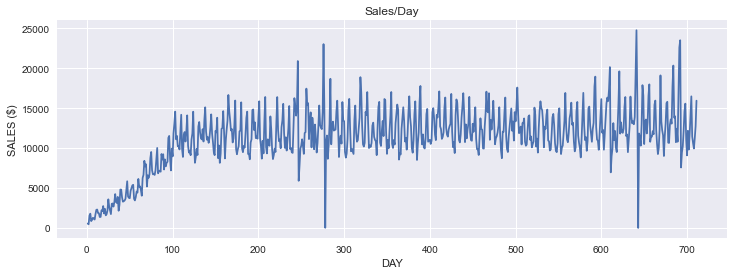

In [22]:
plt.figure(figsize=(12,4))
plt.title('Sales/Day')
plt.xlabel('DAY')
plt.ylabel('SALES ($)')
plt.plot(transactions.groupby('DAY')['SALES_VALUE'].sum())
plt.show()

#### Initial Impression of Sales Plot

**Seasonality/Datetime**
We notice something that could be a seasonal pattern in our sales data. The two very low points (accompanied by a directly-preceding spike, at an even interval from a similar pattern) that look about 365 days apart -- I'd like to investigate whether these could be Christmas and (American) Thanksgiving.

**Issues with Data Acquisition**
I also notice "leading tail" in the data. This is highly suspicious and suggests that data acquisition was not consistent over the duration -- perhaps some households had not yet registered for the survey, or some records have been lost.

**Data Cleaning**
I will later truncate the data to remove this inconsistency, in order to make comparisons regarding sales totals more reasonable and remove bias. For now we'll use all the data available in order to continue sleuthing.


Plotting Sales by Section
---

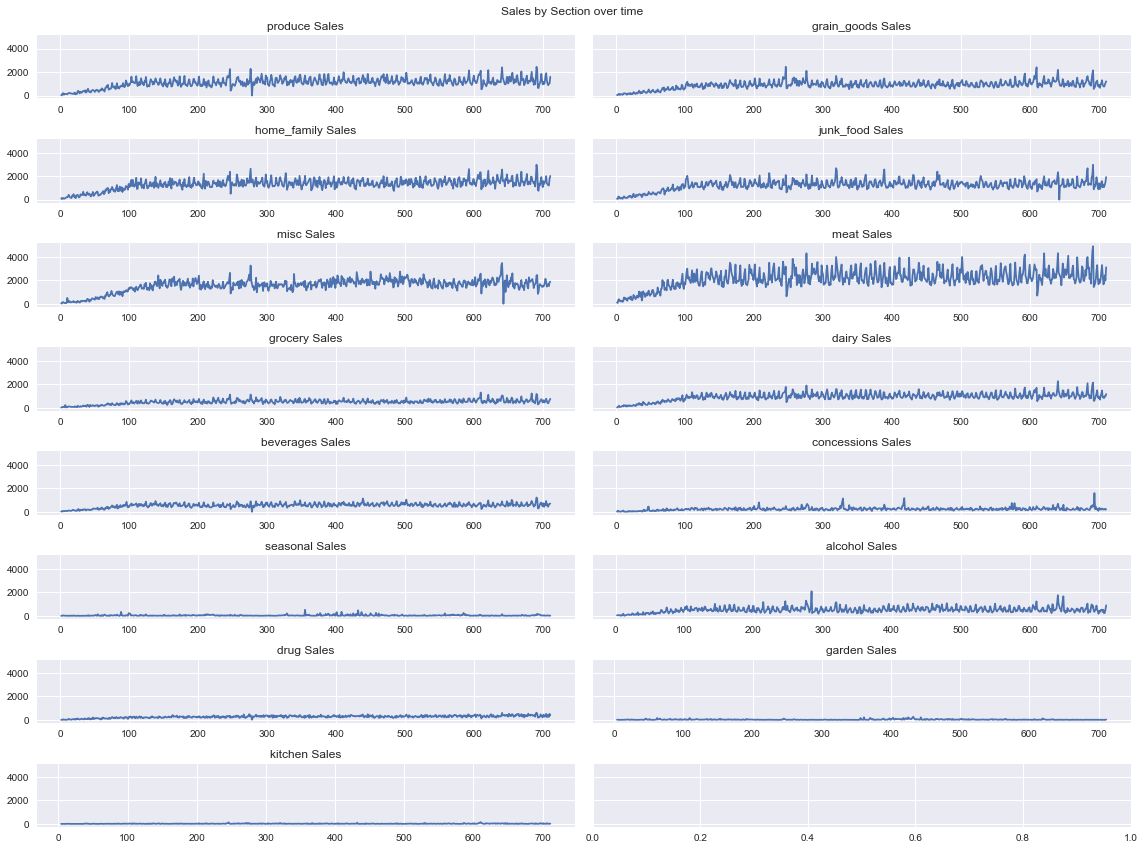

In [23]:

sections = merged['Section Labels'].unique()
plt.subplots(len(sections)//2 +1, 2, sharey='all', figsize=(16,12))
plt.suptitle(f'Sales by Section over time')
for idx, section in enumerate(sections):
    plt.subplot(len(sections)//2 +1, 2, idx+1)
    plt.title(f'{section} Sales')
    plt.plot(merged[merged['Section Labels']==section].groupby('DAY')['SALES_VALUE'].sum(), label=f'{section}')
plt.tight_layout()
plt.show()

There is an issue with 'class distribution' for our distinct Section Labels -- but this is perhaps unavoidable due to the nature of the data.

Adding a DateTime column
---

#### Finding Christmas

Since I know I want to be examining the effect of direct marketing on customers, having datetime information for the table seems a worthwhile addition -- it will make the data more accessible and valuable.

Let's look at the lowest `SALES_VALUE` per `DAY` on the chart, disregarding the first 120 days (we'll assume there is an issue with data acquisition there).

In [24]:
#print lowest sales days:
print(f"Lowest Sum of SALES_VALUE by Day: \n{transactions[transactions['DAY'] > 120].groupby('DAY')['SALES_VALUE'].sum().nsmallest(20).head(8)}") # find Christmas Day, when stores are closed
print()
print(f"The lowest Sales totals were on days 643 and 278. They were {643-278} days apart.\nThe third and fourth lowest were on days 611 and 247. They were {611-247} days apart.")

Lowest Sum of SALES_VALUE by Day: 
DAY
643       2.99
278      22.49
247    5905.22
611    6962.69
693    7573.73
248    7785.53
155    8147.01
126    8154.52
Name: SALES_VALUE, dtype: float64

The lowest Sales totals were on days 643 and 278. They were 365 days apart.
The third and fourth lowest were on days 611 and 247. They were 364 days apart.


I am going to assume these two lowest points to be Christmas Day, despite not having precisely $0 in sales. 

We see that the third and fourth lowest sales days on the data are almost exactly one year apart -- and offset from by 31 and 32 days, respectively, from their 'Christmas'. I interpret this as likely being American Thanksgiving.

This gives us a solid chance of identifying the real dates from which this data originates, because Christmas falls on a different day of the week each year. Let's try to find the day of the week of those two Christmases.

#### Weekly Seasonality

By looking more closely at the data and leveraging some domain knowledge, we can identify days of the week of our sales data by finding a weekly seasonal pattern.

These highest-grossing days are **Saturdays, the busiest day for grocery shopping**. Using this information, we can extrapolate the days of the week for our two Christmases, and then check which years had that sequence of Christmas weekdates.

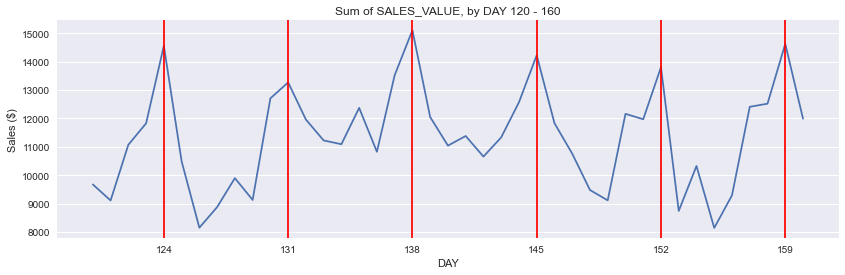

In [25]:
### Using a closer view, we can see the weekly seasonality.
start=120
stop=160

myslice = transactions[transactions['DAY'].between(start, stop)]
plt.figure(figsize=(14,4))
plt.title(f'Sum of SALES_VALUE, by DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum())

sats = [124, 131, 138, 145]

for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='red')

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.xticks(range(sats[0], stop, 7))
plt.show()

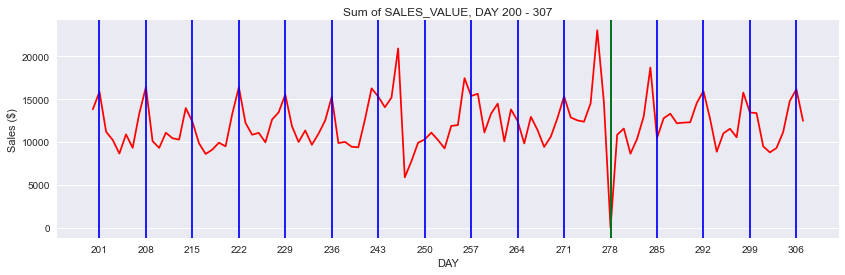

In [26]:
# (CHRISTMAS 1) and extrapolated to find that DAY 278 actually is a Saturday:

plt.figure(figsize=(14,4))
start = 200
stop = 307
myslice = transactions[transactions['DAY'].between(start, stop)]
plt.title(f'Sum of SALES_VALUE, DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), color='red')

sats = [201]
for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='blue')
plt.xticks(range(sats[0], stop, 7))

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.axvline(278, color='green')
plt.show();


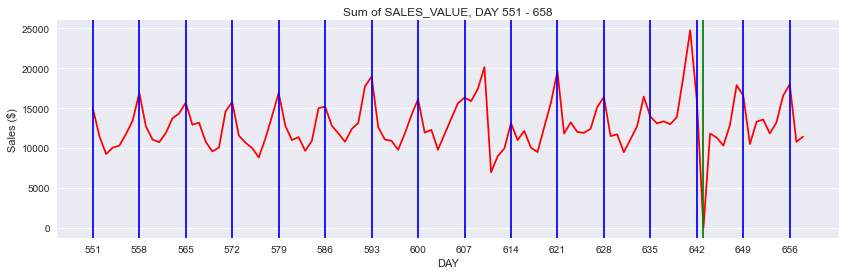

In [27]:
# (CHRISTMAS 2) DAY 643 is a Sunday.  

plt.figure(figsize=(14,4))
start = 551
stop = 658
myslice = transactions[transactions['DAY'].between(start, stop)]
plt.title(f'Sum of SALES_VALUE, DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), color='red')

sats = [551]
for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='blue')
plt.xticks(range(sats[0], stop, 7))

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.axvline(643, color='green')
plt.show();

# 643 is a Sunday

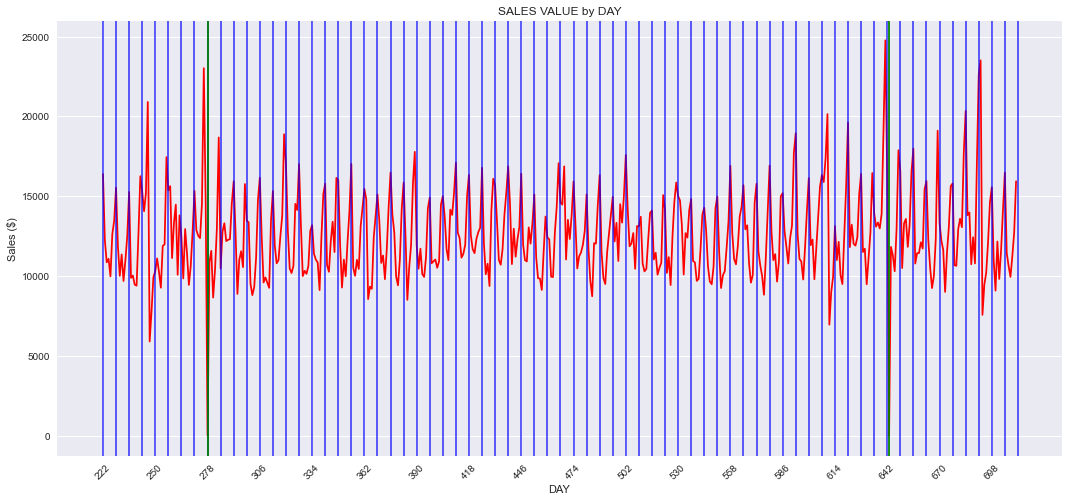

In [28]:
# plot sum of sales by day, identifying christmas and weekly seasonality

start = 222
stop = 713

myslice = transactions[transactions['DAY'].between(start, stop)]

plt.figure(figsize=(18, 8))
plt.title('SALES VALUE by DAY')
plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), c='red')
plt.xticks(rotation=45)


for i in range(start, stop, 7):
    plt.axvline(i, c='blue', alpha=0.7)
    
sats=[222]
plt.axvline(278, c='g')
plt.axvline(643, c='g')
plt.xticks(range(sats[0], stop, 28))
plt.show();


# Finalizing datetime Logic

#### Day 278 is itself a Saturday, and 643 is a Sunday. Let's look up when that combination occured in recent history:

[https://www.timeanddate.com/holidays/us/christmas-day#tb-hol_obs](https://www.timeanddate.com/holidays/us/christmas-day#tb-hol_obs)

Christmas fell on a Saturday and then a Sunday twice in the past 20 years; in 2004/2005, and in 2010/2011. Unfortunately (and maybe predictably), American Thanksgiving also lined up exactly. It was on the 25th and then the 24th of November in both of those pairs of years. We'll have to look for more information in the data.

#### Adding Datetime Information

Despite being unsure of the specific year, we can now assign a date(time) range to our data -- at the very least, we know the weekdays will match up.

In terms of finalizing the year, we're down to two possibilities; that's less than what we had before, and that's a good thing. In classic statistics fashion, I flipped a coin. Let's make a start. 

I'm going to create a datetime range which corresponds to the number of days in our data, and put it up alongside the information we do have; first using the year 2004 as a framework.

In [29]:
# extrapolating datetime range from first christmas as DAY 278, year=2004
import datetime


# set year, and first christmas a date
year=2004
christmas1 = datetime.date(year, 12, 25)
# timedelta to day 1
delta = datetime.timedelta(days=277) #278-1

# DAY 1 is christmas minus the delta (1 + 277 = 278)
first = christmas1 - delta
# DAY 711 is (1 + 710)
last = first + datetime.timedelta(710) 
print(f'first: {first}, last: {last}')

# creating range and constructing a map of values for 'DAY' column;
# create a range of datetime objects
myrange = pd.date_range(first, last)
#len(myrange) # 711

# map datetime index to DAY; enumerate() indexes from 0, so we add 1
mymap = {i+1:x for i, x in enumerate(myrange)}

# check the column to add
# transactions['DAY'].map(lambda x: mymap[x])


# check index(day) 278 is still christmas
print(f'Confirming christmas 1 is at DAY 278: {mymap[278]}')
#mymap


# mapping and applying to transactions df...

transactions['datetime'] = transactions['DAY'].map(lambda x: mymap[x])

transactions['datetime']

first: 2004-03-23, last: 2006-03-03
Confirming christmas 1 is at DAY 278: 2004-12-25 00:00:00


0         2004-03-23
1         2004-03-23
2         2004-03-23
3         2004-03-23
4         2004-03-23
             ...    
2595727   2006-03-03
2595728   2006-03-03
2595729   2006-03-03
2595730   2006-03-03
2595731   2006-03-03
Name: datetime, Length: 2595732, dtype: datetime64[ns]

So we have a datetime range spanning from March 23, 2004 to March 3, 2006. 

We can easily go back and check the year to the equivalent dates beginning in 2010, should that be necessary -- the code will require just one change. 

Let's dive a little bit deeper to identify other outlying sales points, and perhaps associate them with world events unique to either 2004-2006, or 2010-2012... I'm thinking Superbowls, Black Friday, etc. -- or maybe we get lucky.

# Top 15 Sales Dates

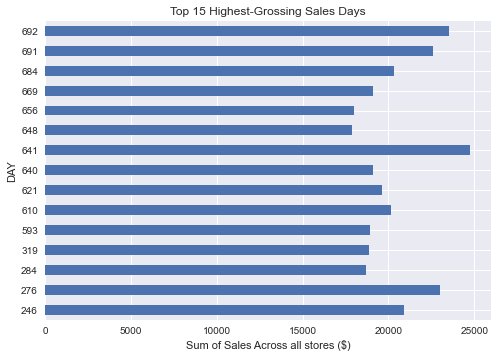

In [30]:
# TOP 15 sales dates in the data, sorted by DAY 
transactions[transactions['DAY'] > 120].groupby('DAY')['SALES_VALUE'].sum().nlargest(15).reset_index().sort_values('DAY').set_index('DAY').plot(kind='barh')
plt.title('Top 15 Highest-Grossing Sales Days')
plt.legend([])
plt.xlabel('Sum of Sales Across all stores ($)')
plt.show()

The top 15 sales dates are listed above, by descending order of DAY.

There were back-to-back high-ranking sales numbers on DAY 691 and 692 -- an anomaly. 

DAY 692 actually had higher sales than the friday before the first 'Christmas'.

What could possibly drive sales up so high as to compete with Christmas?


#### Investigation and finalizing datetime logic

So what happened on DAY 691 and 692?

In [31]:
mymap[691] # Second-Highest sales date, even above First Christmas -- 

Timestamp('2006-02-11 00:00:00', freq='D')

February 11, 2006 is the date, if we are correct about the year.

I searched back through Google.

It turns out **there was a huge storm in the Northeastern US on February 11/12 of 2006** --  As per [https://www.thepeoplehistory.com/february11th.html](https://www.thepeoplehistory.com/february11th.html);

`What has become known as the Blizzard of 2006 started on the evening of the 11th. Heavy snow fell across the northeastern United States from Virginia to Maine through to the evening of the 12th.`

There is no equivalent for those days in 2012, as far as I can tell. 

2006 is a likely bet for the correct year, and moreover gives us an idea of the location of at least some of these stores -- the Northeastern United States. 

Jackpot.

#### Adding hour and minute to datetime column


There's one more thing we need to do to complete the datetime column: add in the transaction time. 

In [32]:
# converting TRANS_TIME to str to find LENGTH of entry; vectorizing the string lengths and counting values:

vec = transactions['TRANS_TIME'].astype('str')

vec2 = pd.Series([len(x) for x in vec]) 
transactions['vec2'] = vec2
vec2.value_counts()

4    2430677
3     147637
2      14038
1       3380
dtype: int64

So, there are `TRANS_TIME` values with up to 4 digits, and much fewer as we approach 0 digits. Seems promising.

Let's look at the length of each entry:

In [33]:
# 00:0X -- 1 digit entries -- unique values
transactions[transactions['vec2']==1]['TRANS_TIME'].unique()
# 0-9 values... one digit of minutes

array([0, 5, 6, 9, 7, 8, 2, 4, 3, 1], dtype=int64)

In [34]:
# 00:XX -- 2 digit entries -- max value
transactions[transactions['vec2']==2]['TRANS_TIME'].unique().max()
# nothing over 59... two digits of minutes

59

In [35]:
# 0X:XX -- 3 digit entries -- number of unique values [1,2,...9 * 60]
# we would expect to see single digit hours with 60 minutes each:
transactions[transactions['vec2']==3]['TRANS_TIME'].nunique()


540

So 3-digit TRANS_TIME had 540 unique values -- exactly 9 hours worth of 3-digit timestamps.

In [36]:
# sum of sales for transactions with 2 or less digits in TRANS_TIME:
transactions[transactions['vec2']<=2]['SALES_VALUE'].sum()


48879.16

In [37]:
transactions[transactions['TRANS_TIME']<100]['SALES_VALUE'].sum()
# all transactions with trans_time less than 100 (1AM.)

48879.16

In order to map the `TRANS_TIME` to datetime effectively, let's fill the empty spaces in the column with 0's, such that we can apply timedelta.

# Including transaction time in datetime column

In [38]:
# define a function to split TRANS_TIME into hour and minute values:
def split_column(row):
    if len(str(row)) ==1:
        hour = "00"
        minute = "0"+str(row)[1:]
    elif len(str(row)) == 2:
        hour = "00"
        minute = str(row)
    elif len(str(row)) ==3:
        hour = "0" + str(row)[0]
        minute = str(row)[-2:]
    elif len(str(row)) ==4:
        hour = str(row)[:2]
        minute = str(row)[2:]
        
    return hour, minute

# split TRANS_TIME and create HOUR and MINUTE vectors; convert to timedelta format;
a = transactions['TRANS_TIME'].apply(split_column)

transactions['HOUR'] = [element[0] for element in a]
transactions['MINUTE'] = [element[1] for element in a]

transactions['HOUR'] = pd.to_timedelta(transactions['HOUR'].astype('int'), unit='hour')
transactions['MINUTE'] = pd.to_timedelta(transactions['MINUTE'].astype('int'), unit='minute')

# broadcast timedelta to the datetime column and drop 'vec2', 'HOUR', 'MINUTE' columns
transactions['datetime'] = transactions['datetime'] + transactions['HOUR'] + transactions['MINUTE']

transactions.drop(['vec2', 'HOUR', 'MINUTE'], axis=1, inplace=True)

transactions['datetime']

0         2004-03-23 16:31:00
1         2004-03-23 16:31:00
2         2004-03-23 16:31:00
3         2004-03-23 16:31:00
4         2004-03-23 16:31:00
                  ...        
2595727   2006-03-03 15:20:00
2595728   2006-03-03 15:20:00
2595729   2006-03-03 15:20:00
2595730   2006-03-03 15:20:00
2595731   2006-03-03 15:20:00
Name: datetime, Length: 2595732, dtype: datetime64[ns]

# Truncating `transaction_data.csv`

#### Truncating the data to remove leading and trailing tails:

In [44]:
merged['datetime'] = my_funcs.add_datetime(merged)

In [45]:
merged = merged[merged['DAY'].astype('int') >= 111]

# truncating the end of our timeframe by `WEEK_NO`. '91 is the year I was born.
merged = merged[merged['WEEK_NO'].astype('int') <= 91]

last_day = merged['DAY'].max()
# we've added datetime to the transactions table..

After examining the transactions table's sales by commodity, I noticed that gasoline made up a large part of the sales.

A correlation heatmap of the sales by commodity reveals a surprising level of correlation between 'CORP USE ONLY' and the sums of each other category.


Plotting Sales by Section
---

In [46]:
# drop all rows where sub_commodity = GASOLINE-REG UNLEADED
merged.drop(merged[merged['SUB_COMMODITY_DESC']=='GASOLINE-REG UNLEADED'].index, axis=0, inplace=True)
merged.drop(merged[merged['COMMODITY_DESC']=='GASOLINE-REG UNLEADED'].index, axis=0, inplace=True)

#### Checking Truncation

Text(0.5, 0, 'Date/Time')

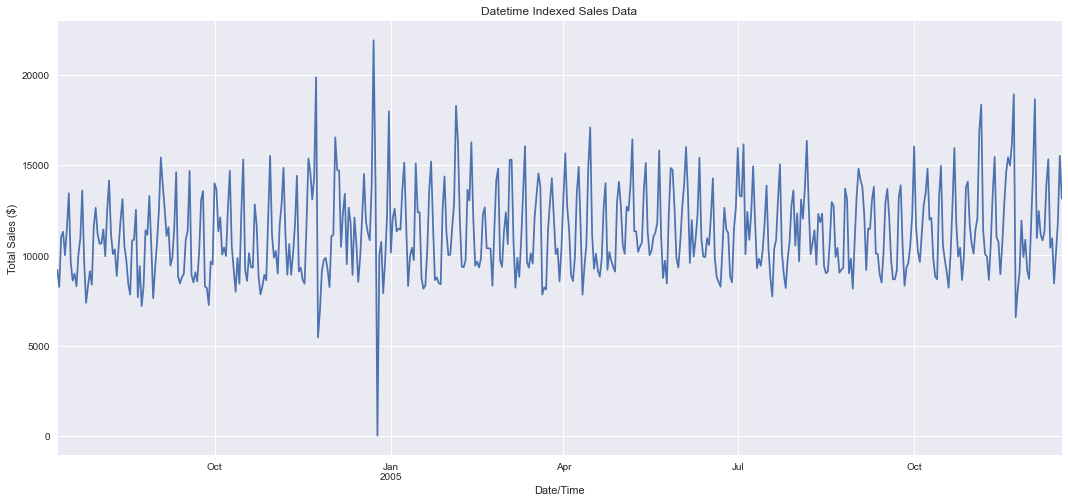

In [47]:
merged.set_index('datetime').resample('D')['SALES_VALUE'].sum().plot(figsize=(18, 8))
plt.title('Datetime Indexed Sales Data')
plt.ylabel('Total Sales ($)')
plt.xlabel('Date/Time')

Great. This data looks much more **stationary -- a necessity for performing time-series analysis** although we notice that we've lost our second Christmas in the truncation.

---

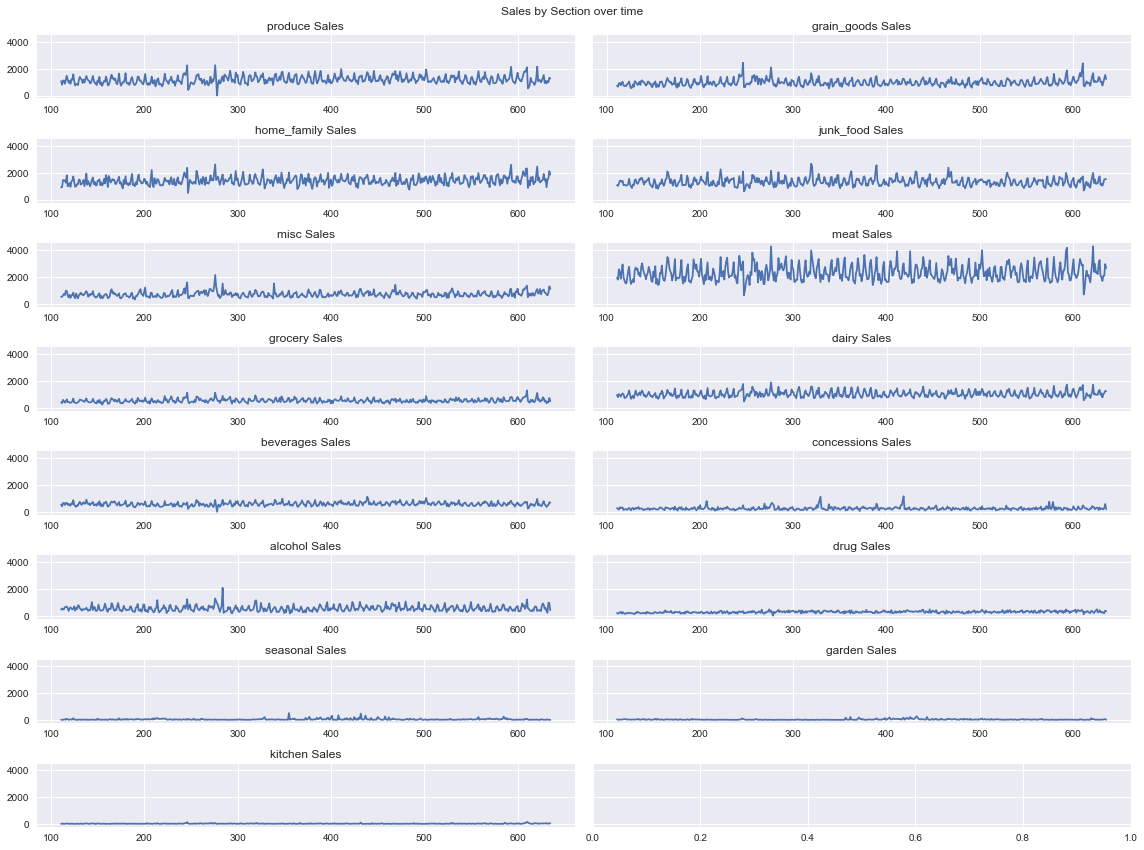

In [48]:
#
sections = merged['Section Labels'].unique()
plt.subplots(len(sections)//2 +1, 2, sharey='all', figsize=(16,12))
plt.suptitle(f'Sales by Section over time')
for idx, section in enumerate(sections):
    plt.subplot(len(sections)//2 +1, 2, idx+1)
    plt.title(f'{section} Sales')
    plt.plot(merged[merged['Section Labels']==section].groupby('DAY')['SALES_VALUE'].sum(), label=f'{section}')
plt.tight_layout()
plt.show()

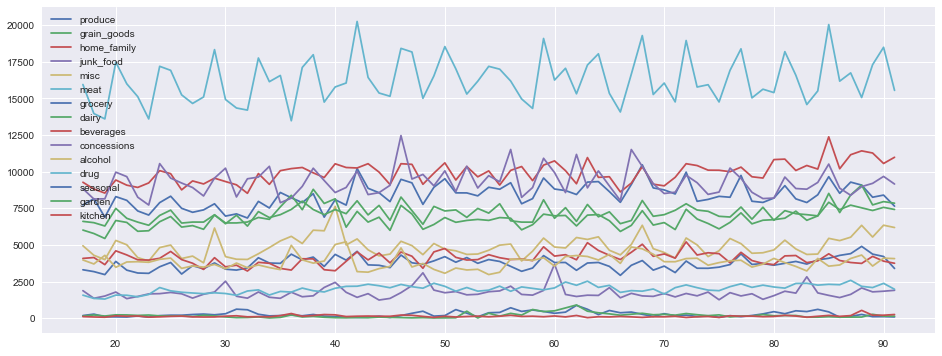

In [49]:
# plotting business monthly sales by section
plt.figure(figsize=(16,6))
for section in merged['Section Labels'].unique():
    
    plt.plot(merged[merged['Section Labels']==section].groupby('WEEK_NO')['SALES_VALUE'].sum(), label=f'{section}')
    
    
plt.legend()

Interpretation
---

In the above graph we see the sales over time for each section, using our new labels.

    meat
    home_family
    junk_food
    grocery
    grain_goods
    dairy

are the highest-grossing sections, according to these new labels.